<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/OIBSIB/blob/main/TASK-3/Car-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction with Machine Learning

# Table of Contents
1. [Introduction](Iintroduction)
2. [Data Exploration](#data-exploration)
3. [Data Visualization](#data-visualization)
    1. [Car Price Distribution](#car-price-distribution)
    2. [Year vs Selling Price](#year-vs-selling-price)
    3. [Year vs Driven (in kms)](#year-vs-driven-in-kms)
    4. [Present Price vs Selling Price](#present-price-vs-selling-price)
    5. [Driven (in kms) vs Selling Price](#driven-in-kms-vs-selling-price)
4. [Data Preprocessing](#data-preprocessing)
    1. [One-Hot Encoding](#one-hot-encoding)
5. [Model Training](#model-training)
    1. [Linear Regression](#linear-regression)
    2. [Random Forest Regressor](#random-forest-regressor)
6. [Model Evaluation](#model-evaluation)
7. [Results](#results)
8. [Conclusion](#conclusion)


# Introduction
Welcome to the Jupyter Notebook for Task 3: Car Price Prediction with Machine Learning. In this task, our objective is to develop and evaluate machine learning models for predicting the selling prices of cars based on various features. The dataset used in this analysis includes information such as the year of manufacture, present price, driven kilometers, fuel type, selling type, transmission, and more.

## Objective

The primary goals of this analysis are as follows:
1. **Explore the Dataset:** Understand the structure of the dataset, identify key features, and gain insights into the distribution of car prices.
2. **Visualize Relationships:** Visualize relationships between key features and the selling price to uncover patterns and trends.
3. **Data Preprocessing:** Prepare the data for modeling by handling categorical variables, performing one-hot encoding, and scaling numerical features.
4. **Model Training:** Train two regression models—Linear Regression and Random Forest Regressor—to predict car prices.
5. **Model Evaluation:** Evaluate the performance of the trained models using metrics such as Mean Absolute Error, Mean Squared Error, and R2 Score.
6. **Results and Insights:** Summarize the results, compare the performance of the models, and provide insights into the predictive capabilities.

## Dataset

The dataset used in this analysis contains information about various cars and their selling prices. Features include the year of manufacture, present price, driven kilometers, fuel type, selling type, transmission, and more. Exploring this dataset will enable us to build models that can accurately predict the selling prices of cars based on these features.

Now, let's begin our exploration and analysis of car prices, starting with an overview of the dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Data Exploration
Explore the dataset using methods such as `head()`, `describe()`, and `info()` to understand its structure and identify key features. Gain insights into the distribution of car price


In [2]:
# Load the dataset
file_url = 'https://raw.githubusercontent.com/Ashutosh-Singh-Thakur/OIBSIP/main/TASK-3/car%20data.csv'
df = pd.read_csv(file_url)
# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Display summary statistics of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data Visualization

## Car Price Distribution
Visualize the distribution of car prices using a histogram to understand the spread and frequency of different price ranges.

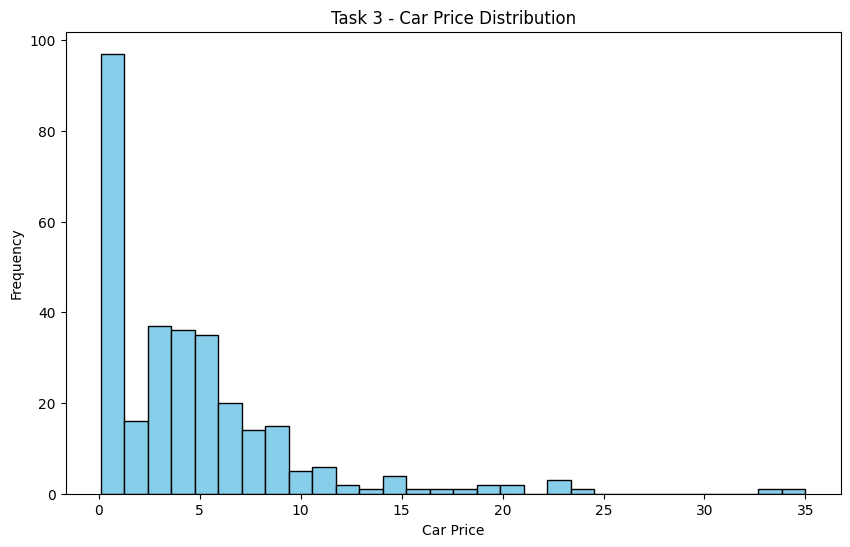

In [5]:
# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
plt.hist(df['Selling_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Task 3 - Car Price Distribution')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

## Year vs Selling Price
Explore the correlation between the manufacturing year of a car and its selling price using a bar plot


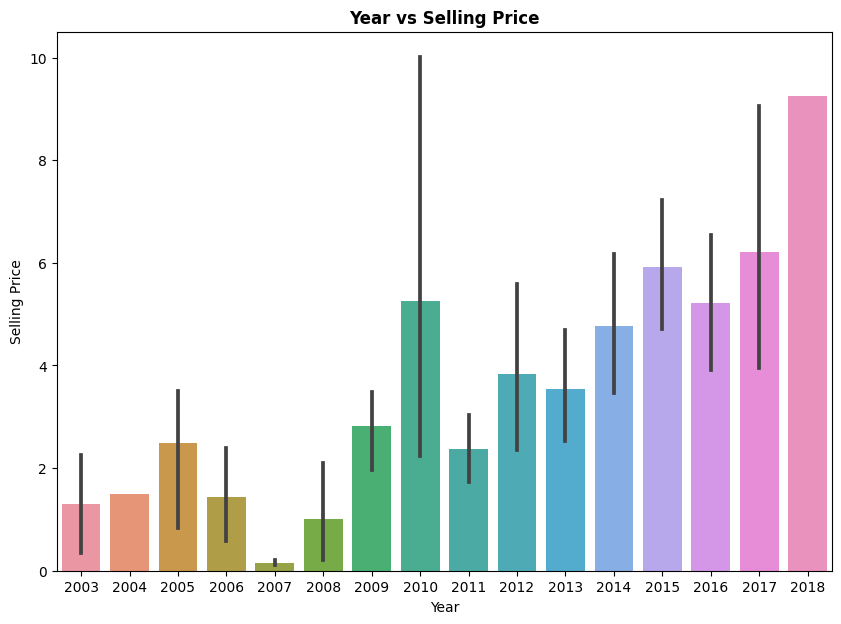

In [6]:
# Visualize the relationship between 'Year' and 'Selling_Price'
fig = plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'Year', y = 'Selling_Price')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price", fontweight = 'bold')
plt.show()

## Year vs Driven (in kms)
Investigate the relationship between the manufacturing year and the distance a car has been driven using a box plot.

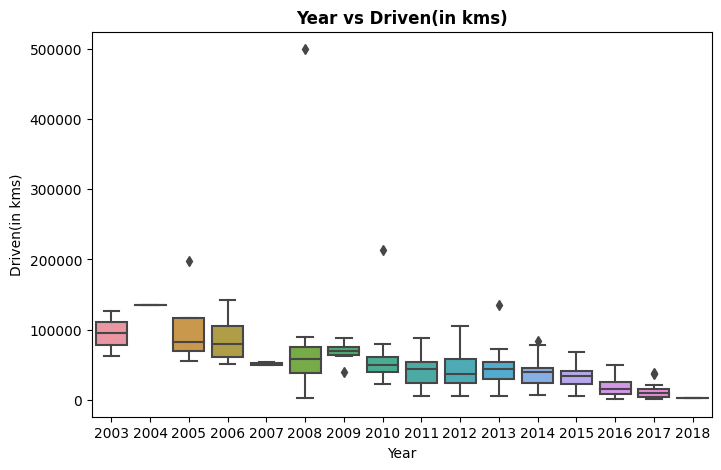

In [7]:
# Visualize the relationship between 'Year' and 'Driven_kms'
fig = plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = df['Year'], y = df['Driven_kms'])
plt.xlabel("Year")
plt.ylabel("Driven(in kms)")
plt.title("Year vs Driven(in kms)", fontweight = 'bold')
plt.show()

## Present Price vs Selling Price
Examine the correlation between the present price and selling price using a regression plot.

## Driven (in kms) vs Selling Price
Visualize how the distance a car has been driven affects its selling price with a scatter plot


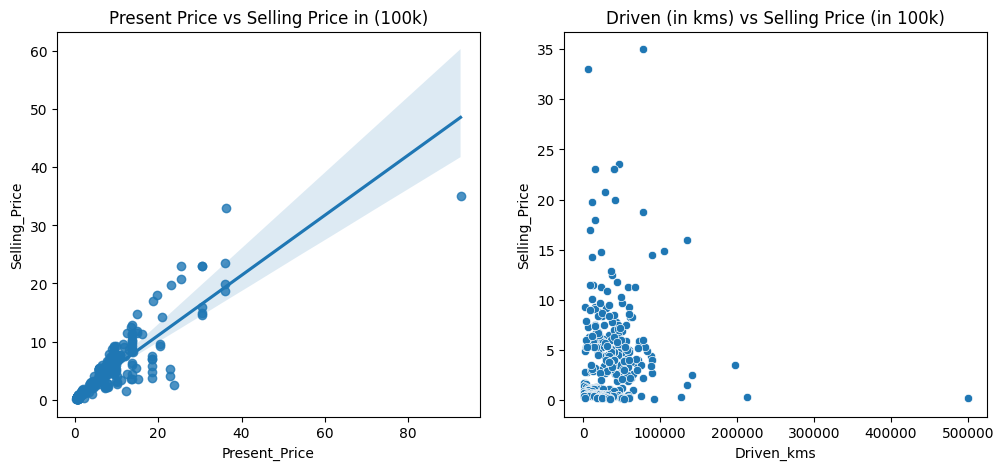

In [8]:
# Visualize the relationship between 'Present_Price' and 'Selling_Price', and 'Driven_kms' and 'Selling_Price'
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.regplot(data = df, x = df['Present_Price'], y = df['Selling_Price'])
plt.title('Present Price vs Selling Price in (100k)')
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = df['Driven_kms'], y = df['Selling_Price'])
plt.title('Driven (in kms) vs Selling Price (in 100k)')
plt.show()

# Data Preprocessing

## One hot Encoding
Perform one-hot encoding to handle categorical variables such as car name, fuel type, selling type, and transmission.


In [9]:
# Perform one-hot encoding for categorical features
new_df =  pd.get_dummies(data = df,
                         columns=['Car_Name','Fuel_Type', 'Selling_type', 'Transmission'])

In [10]:
# Split the data into features and target variable (Y)
features = new_df.drop(columns=['Selling_Price'], axis=1)
Y = df['Selling_Price']

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# Model Training

## Linear Regression
Train a Linear Regression model to predict car prices based on the preprocessed features.

In [12]:
# Linear Regression model
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

## Random Forest Regressor
Train a Random Forest Regressor model, a more complex algorithm, to compare its performance with Linear Regression.

In [13]:
# Random Forest Regressor model
RandomForestReg = RandomForestRegressor(n_estimators=100, random_state=10)
RandomForestReg.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [14]:
# Make predictions using both models
lr_pred = LinearReg.predict(x_test)
rfr_pred = RandomForestReg.predict(x_test)
# Display a sample of predictions
print(f'Y predict using\nLinear Regression : {lr_pred[0:6]}\nRandom Forest Regressor : {rfr_pred[0:6]}')

Y predict using
Linear Regression : [8.99684378 0.70549364 2.26478614 1.23420232 5.96480281 7.37463158]
Random Forest Regressor : [8.6798 0.6698 2.668  0.7527 5.157  5.79  ]


# Model Evaluation
Evaluate the performance of the trained models using metrics such as Mean Absolute Error, Mean Squared Error, and R2 Score.

In [15]:
# Evaluate model performance using metrics
LR_MAE = metrics.mean_absolute_error(y_test, lr_pred)
LR_MSE = metrics.mean_squared_error(y_test, lr_pred)
LR_R2 = metrics.r2_score(y_test, lr_pred)

RFR_MAE = metrics.mean_absolute_error(y_test, rfr_pred)
RFR_MSE = metrics.mean_squared_error(y_test, rfr_pred)
RFR_R2 = metrics.r2_score(y_test, rfr_pred)

## Results
Summarize the results, compare the performance of the Linear Regression and Random Forest Regressor models, and provide insights into their predictive capabilities.

In [16]:
# Create a summary report table
Report = pd.DataFrame(
    {'Linear Regression': [LR_MAE, LR_MSE, LR_R2],
     'Random Forest Regressor': [RFR_MAE, RFR_MSE, RFR_R2],
    }, index = ['Mean Absolute Error', 'Mean Squared Error', 'R2 Score'])

# Display the summary report
Report

,Linear Regression,Random Forest Regressor
Mean Absolute Error,1.507058,0.648656
Mean Squared Error,7.196046,2.400151
R2 Score,0.778359,0.926074


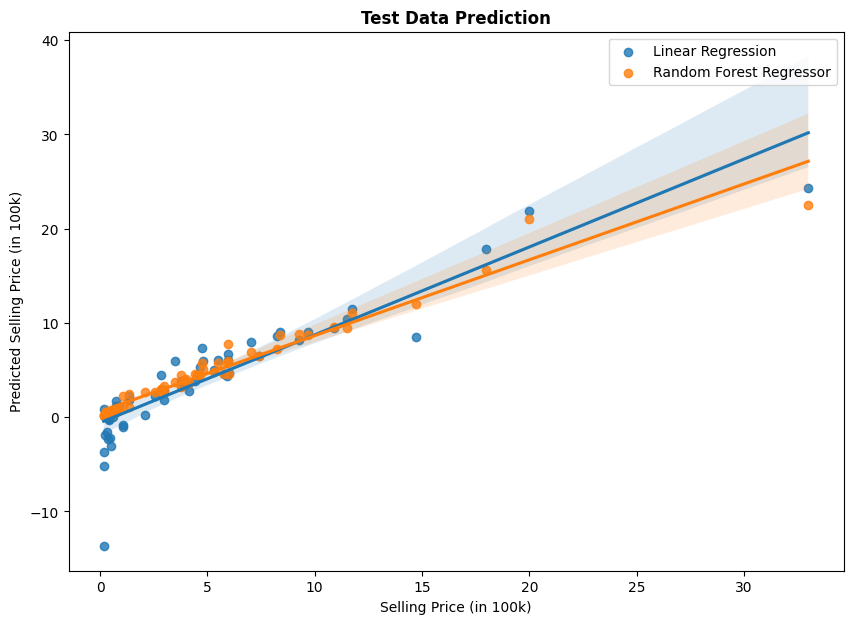

In [17]:
# Visualize the predicted values against the actual values
plt.figure(figsize = (10,7))
sns.regplot(x = y_test,y = lr_pred, label = 'Linear Regression')
sns.regplot(x = y_test,y = rfr_pred, label = 'Random Forest Regressor')
plt.legend()
plt.xlabel('Selling Price (in 100k)')
plt.ylabel('Predicted Selling Price (in 100k)')
plt.title('Test Data Prediction', fontweight = 'bold')
plt.show()

In [18]:
# Save the trained Random Forest Regressor model to a file
import pickle
pickle.dump(RandomForestReg,open('car_price.pkl','wb'))

# Conclusion

In conclusion, the analysis of car price prediction using machine learning models has provided valuable insights into the factors influencing the selling prices of cars.

1. **Comparison of Models:**
   - The Random Forest Regressor outperformed the Linear Regression model in terms of Mean Absolute Error, Mean Squared Error, R2 Score.

2. **Data Patterns:**
   - Visualizations revealed interesting patterns between certain features (e.g., manufacturing year, present price, etc.) and selling prices.


## Author
 Ashutosh Singh Thakur